## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below
import tensorflow
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
pwd

'C:\\Users\\lenovo\\Desktop\\Malaria_detector'

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Valid'
test_path = 'cell_images/Test'



In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('cell_images/Train/*')

In [8]:
folders

['cell_images/Train\\Parasitized', 'cell_images/Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [17]:
training_set

In [18]:
valid_set = valid_datagen.flow_from_directory('cell_images/Valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 21 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
862/862 [==============================] - 898s 1s/step - loss: 0.4672 - accuracy: 0.7762 - val_loss: 0.2326 - val_accuracy: 0.9283
Epoch 2/5
862/862 [==============================] - 688s 798ms/step - loss: 0.2309 - accuracy: 0.9272 - val_loss: 0.1740 - val_accuracy: 0.9398
Epoch 3/5
862/862 [==============================] - 679s 788ms/step - loss: 0.2011 - accuracy: 0.9353 - val_loss: 0.1638 - val_accuracy: 0.9467
Epoch 4/5
862/862 [==============================] - 679s 788ms/step - loss: 0.1955 - accuracy: 0.9351 - val_loss: 0.1599 - val_accuracy: 0.9484
Epoch 5/5
862/862 [==============================] - 681s 789ms/step - loss: 0.1821 - accuracy: 0.9407 - val_loss: 0.1466 - val_accuracy: 0.9505


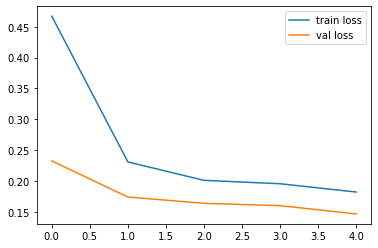

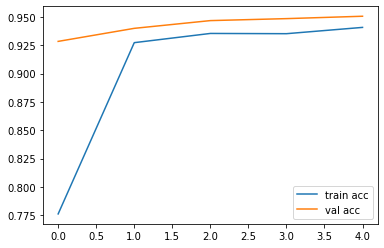

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('new_model_vgg19.h5')

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [24]:
model=load_model('new_model_vgg19.h5')

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[9.9999940e-01, 6.0259521e-07],
       [8.9331670e-03, 9.9106687e-01],
       [1.1961594e-02, 9.8803842e-01],
       [9.9996185e-01, 3.8122005e-05],
       [9.0591926e-03, 9.9094075e-01],
       [9.9709451e-01, 2.9055425e-03],
       [2.5422180e-02, 9.7457778e-01],
       [9.9237740e-01, 7.6225987e-03],
       [9.9999344e-01, 6.5502313e-06],
       [9.7302341e-01, 2.6976634e-02],
       [5.9262007e-01, 4.0737993e-01],
       [9.9965823e-01, 3.4182193e-04],
       [9.9761730e-01, 2.3826973e-03],
       [1.0885223e-02, 9.8911476e-01],
       [1.3332798e-02, 9.8666722e-01],
       [7.0727477e-03, 9.9292725e-01],
       [9.7542328e-01, 2.4576699e-02],
       [5.2060273e-02, 9.4793975e-01],
       [6.2973755e-03, 9.9370265e-01],
       [1.0000000e+00, 1.8831138e-08],
       [1.6901692e-02, 9.8309833e-01]], dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [29]:
# img=image.load_img('cell_images/Test/Uninfected/4.png',target_size=(224,224))



In [35]:
img=image.load_img('cell_images/Test/Parasitized/4.png',target_size=(224,224))



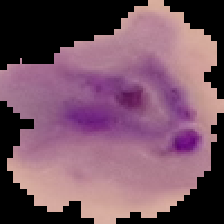

In [36]:
img

In [37]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [38]:
preds = model.predict(img)
pred = np.argmax(preds,axis = 1)

In [39]:
pred

array([0], dtype=int64)

In [40]:
if(pred==1):
    print("Uninfected")
else:
    print("Infected")

Infected
